In [1]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import xgboost as xgb

In [4]:
df = pd.read_csv('data/nba.csv')
curry = df[df['PLAYER_NAME']=='Stephen Curry']
curry.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,Season
445,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801215,2019-04-09,GSW @ NOP,W,...,0,0,0,0,5,1,5.7,0,0,2018-19
564,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801205,2019-04-07,GSW vs. LAC,W,...,1,1,3,1,27,35,45.0,0,0,2018-19
1013,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801191,2019-04-05,GSW vs. CLE,W,...,1,0,1,4,40,5,56.7,0,0,2018-19
1069,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801179,2019-04-04,GSW @ LAL,W,...,0,1,1,2,7,32,30.5,0,0,2018-19
1391,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801164,2019-04-02,GSW vs. DEN,W,...,0,0,4,4,17,25,34.3,0,0,2018-19


In [5]:
curry = curry.assign(date=pd.to_datetime(curry['GAME_DATE']))
curry.sort_values(by=['date'], inplace=True)
curry = curry.reset_index(drop=True)

In [6]:
curry.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,Season,date
0,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900015,2009-10-28,GSW vs. HOU,L,...,1,2,2,14,7,36.9,0,0,2009-10,2009-10-28
1,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900030,2009-10-30,GSW @ PHX,L,...,1,5,4,12,-19,20.4,0,0,2009-10,2009-10-30
2,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900069,2009-11-04,GSW vs. MEM,W,...,0,4,0,7,-4,31.5,0,0,2009-10,2009-11-04
3,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900082,2009-11-06,GSW vs. LAC,L,...,0,6,4,5,-13,10.7,0,0,2009-10,2009-11-06
4,2009-10,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,20900096,2009-11-08,GSW @ SAC,L,...,1,4,3,9,-5,17.8,0,0,2009-10,2009-11-08


In [7]:
curry.tail()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,Season,date
689,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801164,2019-04-02,GSW vs. DEN,W,...,0,4,4,17,25,34.3,0,0,2018-19,2019-04-02
690,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801179,2019-04-04,GSW @ LAL,W,...,1,1,2,7,32,30.5,0,0,2018-19,2019-04-04
691,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801191,2019-04-05,GSW vs. CLE,W,...,0,1,4,40,5,56.7,0,0,2018-19,2019-04-05
692,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801205,2019-04-07,GSW vs. LAC,W,...,1,3,1,27,35,45.0,0,0,2018-19,2019-04-07
693,2018-19,201939,Stephen Curry,1610612744,GSW,Golden State Warriors,21801215,2019-04-09,GSW @ NOP,W,...,0,0,0,5,1,5.7,0,0,2018-19,2019-04-09


In [8]:
curry.shape

(694, 37)

In [9]:
curry.columns

Index(['SEASON_YEAR', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID',
       'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP',
       'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2',
       'TD3', 'Season', 'date'],
      dtype='object')

In [146]:
#export
def get_features(player_df):
    player_df = player_df.assign(
        target=player_df['PTS'].shift(-1),
        home=player_df['MATCHUP'].apply(lambda x: x if type(x)==np.float else int(x.split()[1]=='vs.')).shift(-1),
        days_rest = (player_df['date'] - player_df['date'].shift()).shift(-1).dt.days
    )

    features = player_df[['target', 'home', 'days_rest', 'MIN', 'FGA', 'FG_PCT', 'PTS']].copy()

    ewma = features[['MIN', 'FGA', 'FG_PCT', 'PTS']].ewm(alpha=0.1).mean()
    ewma.columns = ['MIN_ewma', 'FGA_ewma', 'FG_PCT_ewma', 'PTS_ewma']
    features = pd.concat([features, ewma], axis=1)

    features.dropna(axis=0, inplace=True)
    
    return features

In [147]:
get_features(curry).head()

,target,home,days_rest,MIN,FGA,FG_PCT,PTS,MIN_ewma,FGA_ewma,FG_PCT_ewma,PTS_ewma
0,12.0,0.0,2.0,35.650000,12,0.583,14,35.650000,12.000000,0.583000,14.000000
1,7.0,1.0,5.0,39.076667,9,0.556,12,37.453509,10.421053,0.568789,12.947368
2,5.0,1.0,2.0,28.450000,6,0.500,7,34.131181,8.789668,0.543406,10.752768
3,9.0,0.0,2.0,21.533333,5,0.200,5,30.467951,7.687700,0.443550,9.079965
4,8.0,1.0,1.0,31.250000,8,0.500,9,30.658923,7.763962,0.457334,9.060438


In [148]:
curry[['date', 'PTS', 'MATCHUP']].head()

,date,PTS,MATCHUP
0,2009-10-28,14,GSW vs. HOU
1,2009-10-30,12,GSW @ PHX
2,2009-11-04,7,GSW vs. MEM
3,2009-11-06,5,GSW vs. LAC
4,2009-11-08,9,GSW @ SAC


In [149]:
features = get_features(curry)

In [150]:
split = int(len(features)*.7); split

485

In [151]:
features_train = features.iloc[:split]
features_test = features.iloc[split:]

X_train = features_train.drop(columns=['target'])
y_train = features_train['target']

X_test = features_test.drop(columns=['target'])
y_test = features_test['target']

In [152]:
reg = xgb.XGBRegressor(n_estimators=50)
reg.fit(X_train, y_train,
       verbose=False)

[15:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/envs/fastai/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/envs/fastai/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

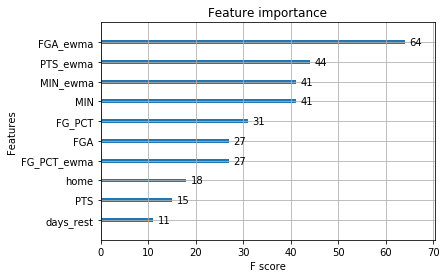

In [153]:
xgb.plot_importance(reg)

In [154]:
preds = reg.predict(X_test)

In [155]:
mae(y_test, preds)

6.561362935946538

In [157]:
mae(features_test['target'], features_test['PTS'])

9.822115384615385

In [158]:
mae(features_test['target'], features_test['PTS_ewma'])

6.932153322892183

In [159]:
features[features['home']==1]['target'].mean()

23.097421203438394

In [160]:
features[features['home']==0]['target'].mean()

23.953488372093023

In [173]:
# !python notebook2script.py feature_engineering.ipynb

Converted feature_engineering.ipynb to utils.py


## Kalman Filter

In [10]:
pts = curry['PTS']

In [11]:
pts.shape

(694,)

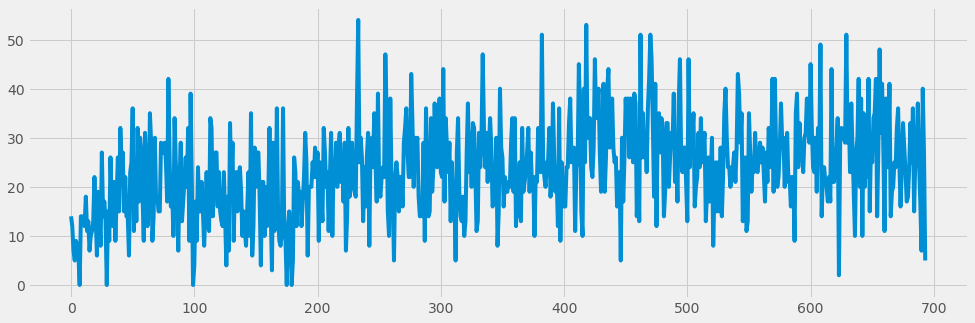

In [20]:
pts.plot(figsize=(15,5))

In [13]:
ewma = pts.ewm(alpha=0.1).mean()

In [14]:
ewma.shape

(694,)

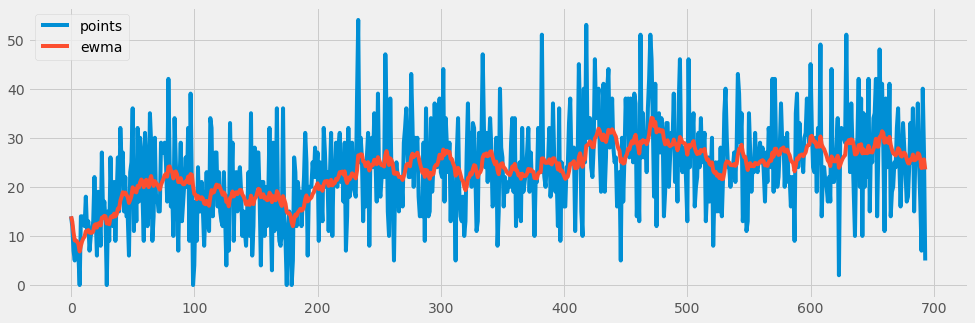

In [19]:
pd.DataFrame({'points':pts, 'ewma':ewma}).plot(figsize=(15,5))

In [23]:
from pykalman import KalmanFilter

In [24]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [25]:
means, covs = kf.filter(pts)

In [26]:
means.shape, covs.shape

((694, 1), (694, 1, 1))

In [27]:
means[:10]

array([[7.        ],
       [8.68874172],
       [8.25300968],
       [7.56542111],
       [7.82543462],
       [7.85345999],
       [7.58341799],
       [6.56177486],
       [7.5021483 ],
       [8.28219643]])

In [28]:
means = pd.Series(means.flatten(), index=pts.index)

In [29]:
means.shape

(694,)

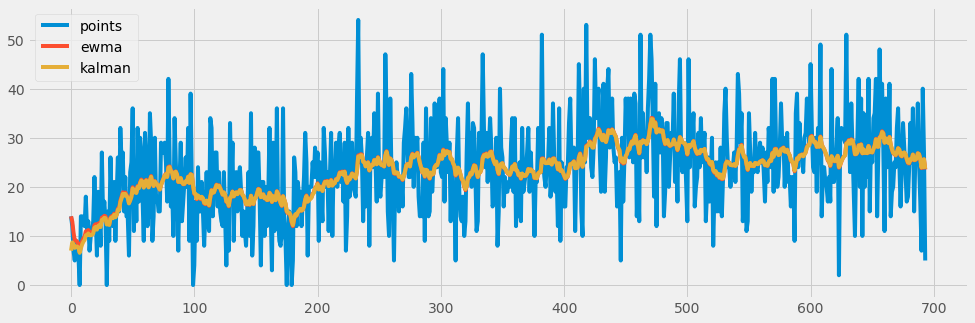

In [30]:
pd.DataFrame({'points':pts, 'ewma':ewma, 'kalman':means}).plot(figsize=(15,5))

Looks to be the same as exponential smoothing for one variable. Maybe try multiple variables?